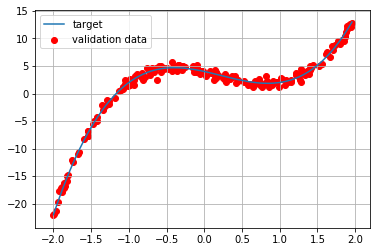

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 27)                54        
_________________________________________________________________
dense_11 (Dense)             (None, 27)                756       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 28        
Total params: 838
Trainable params: 838
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 0s 81us/sample - loss: 29.1324 - mean_squared_error: 29.1325 - val_loss: 18.1812 - val_mean_squared_error: 18.1812
Epoch 2/30
2000/2000 [==============================] - 0s 12us/sample - loss: 12.8872 - mean_squared_error: 12.8872 - val_loss: 10.6751 - val_mean_squared_error: 10.6751
Epoch 3/30
2000/200

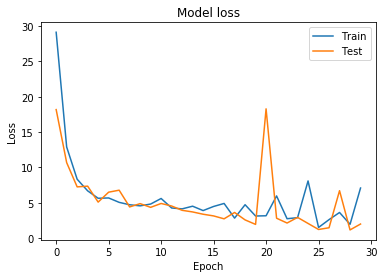

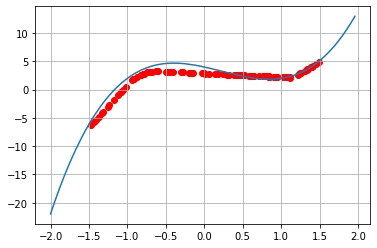

In [6]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-2, 2, 2000)
x_valid = np.random.uniform(-2, 2, 200)
x_valid.sort()
y_target = 4-3*x_valid-2*x_valid**2+3*x_valid**3 # ideal (target) polinomial function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(4-3*x_train-2*x_train**2+3*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid**2+3*x_valid**3, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()


# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(27, input_shape=(1,)))
model.add(Dense(27, activation='relu'))
model.add(Dense(1))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=100, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


# return weights and biases
model.get_weights()


# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted,y_predicted ,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()


